Hello, dear reader! This is the first notebook in the Spring 2019 MCFAM math of machine learning seminar at the University of Minnesota. Join us in person in Vincent Hall 301, 1:30-2:30 pm, in February 2019.

This notebook is an overview of topics. On Feb 12, we talked about
* supervised vs. unsupervised learning (and reinforcement learning and semi-supervised learning)
* classification vs. regression
* thinking about how to choose the right model for the data
* pitfalls to be aware of in modeling and machine learning.

We also talked about uses of machine learning: prediction, recommendation and ranking, classification, etc.

Lots of small examples were discussed as illustrations.

This worksheet is copyleft by Kaisa Taipale, 2019, under the GNU Affero GPL.

In [1]:
# Here I'll show my version of Python and compiler for troubleshooting purposes

import sys
print(sys.version)
print(sys.version_info)
    

3.6.4 |Anaconda, Inc.| (default, Mar 12 2018, 20:05:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


## Load packages and data files

At the top here and in all future notebooks, I'll just have a big cell collecting all the libraries that I want to use in the notebook, as well as code to make images display inline. I'll also load the csv files for the mystery data we'll play with.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [3]:
mystery1 = pd.read_csv("mysteryclassification1.csv")
mystery2 = pd.read_csv("mysteryclassification2.csv")
mystery3 = pd.read_csv("mysteryclassification3.csv")

In [4]:
# look at the head of the file to see the columns and their names
mystery1.head()

,Unnamed: 0,x,y,label
0,0,5.280970,1.204741,0
1,1,4.961629,2.258766,0
2,2,6.756600,-3.425428,2
3,3,5.584285,-2.927440,2
4,4,5.608585,-7.284468,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f1ae320>]],
      dtype=object)

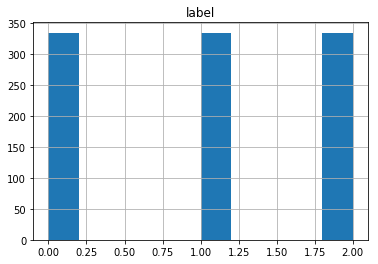

In [5]:
# how many labels are in mystery1?
mystery1.hist(column = "label")

Ok, looks like mystery1 has three labels, while mystery2 and mystery3 have two labels each. What kind of classification can we do? 

You should get familiar with the resources scikit-learn makes available. For instance, to learn about supervised learning algorithms, go here: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

## Apply your first algorithm, without knowing anything

Let's use a decision tree algorithm and apply it, without really knowing how it works.

In part, I want to do this to show you how to *train* and *test* a machine learning (ML) algorithm.

### Train-test split

The training/testing split is really important for creating supervised ML models. Big ideas:
* In much of the online machine learning literature, you have *features* (the inputs) X and *labels* (the outputs) y. Yes, X is capitalized and y is lowercase.
* You want to randomly pick a lot of the features and their labels to *train* the data, and leave the rest of the features and labels to *test* the data.
* The percentage of data in each set is up to you, but many people use 75-80% of data for training and 20-25% of data for testing.
* You can use the testing data to compute an accuracy score for your model. This is one good way of comparing models.

Why do you have to pick randomly to assemble the training data? Think of a phone book in Minnesota and some model that you are creating that takes in names from the phone books. If you don't choose randomly, you may train your model on a set that contains many Andersons and Andersens, and test the model on a set that contains many Vangs and Xus. For some purposes, this may work fine, but if you are trying to model how many people will use your Norwegian-language translation service or how many bottles of spicy versus mild hot pepper sauce you want to produce... you may get inaccurate model results! 

### Train-validate-test split

The train-test split is enough for models that have parameters that are 'learned' purely from the data. For instance, in a linear regression obtained by minimizing residual sum of squared error, all parameters are computed in the minimization process. However, we'll start using algorithms like support vector machines, k-nearest neighbors, and neural networks that also use parameters specified by the modeller. Some people call these 'hyperparameters'. How do you decide on k for k-nearest-neighbors, for instance?

For these types of models, it is better to use a train-validate-test split. You use the training set to train your models, you use the validation set to pick the best hyperparameters (the best value of k for k-nearest neighbors, for instance), and the test set to test your accuracy.

In [6]:
# Let's put mystery2 into this X, y format
X = mystery2[['x','y']]
y = mystery2[['label']]

In [7]:
# Make a train-test split using scikit-learn's train_test_split
# This leaves 20% of the data as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [8]:
# create a model called clf using the DecisionTreeClassifier method
clf = tree.DecisionTreeClassifier()
# fit the model clf using the training data
clf = clf.fit(X_train, y_train)

In [9]:
# predict the labels for y_test given the features of X_test
y_pred = clf.predict(X_test)

In [10]:
metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.9875

Wow! I did very little work here and created a model I don't understand at all, and I got 99% accuracy! You might get a slightly different number when you run this, because the training and testing sets are selected randomly from the points.

This is why machine learning and artificial intelligence are so cool right now -- and why it's easy to become inappropriately confident about the promise of machine learning and your own abilities.

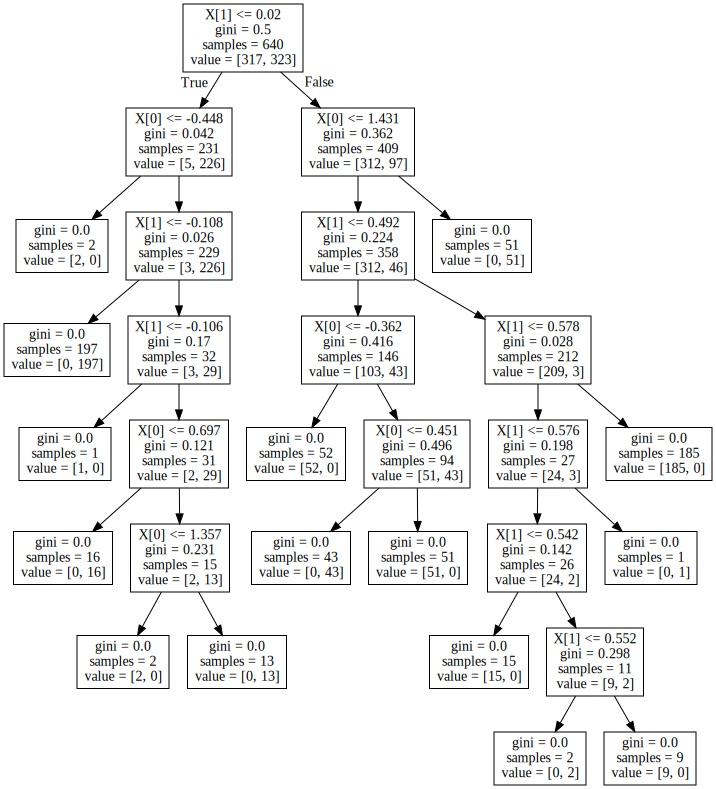

In [12]:
# If you are able to install graphviz, you can visualize the decision tree that you created.
# This is a fun exercise because you can see quickly how ridiculously complex this one is.
# I've been unable to install in Windows,
# and on a Mac with Anaconda, it's important to note that 'conda install graphviz' WON'T HELP
# you must use instead 'conda install python-graphviz'

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)  
graph 


If you've gotten this far, you have all the software working and you have seen how to apply a decision tree algorithm to mystery data. Your turn: apply the decision tree classifier to "mysteryclassification3.csv". What is your accuracy score? 


Challenge: can you modify the code to use decision trees to classify mysteryclassification1.csv? There are three possible labels, rather than two.

Challenge: can you apply the k-nearest neighbors classifier to one of the mystery data files? Consider using this classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


Which is more accurate, the decision tree classifier or k-nearest neighbors? Which value of k did you use? 

Wait, there's another neighbors classifier you could use: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier 

What's the difference between this one and the previous one?